# <center>Bike Sharing Demand</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Import-des-Librairies" data-toc-modified-id="Import-des-Librairies-2">Import des Librairies</a></span></li><li><span><a href="#Import-du-Dataset" data-toc-modified-id="Import-du-Dataset-3">Import du Dataset</a></span></li><li><span><a href="#Exploration-du-Dataset" data-toc-modified-id="Exploration-du-Dataset-4">Exploration du Dataset</a></span><ul class="toc-item"><li><span><a href="#Influence-de-la-temporalité-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-la-temporalité-sur-le-nombre-total-de-locations-4.1">Influence de la temporalité sur le nombre total de locations</a></span></li><li><span><a href="#Influence-de-la-saison-sur-le-nombre-de-locations" data-toc-modified-id="Influence-de-la-saison-sur-le-nombre-de-locations-4.2">Influence de la saison sur le nombre de locations</a></span></li><li><span><a href="#Influence-des-vacances-sur-le-nombre-de-locations" data-toc-modified-id="Influence-des-vacances-sur-le-nombre-de-locations-4.3">Influence des vacances sur le nombre de locations</a></span></li><li><span><a href="#Influence-du-jour-de-la-semaine-sur-le-nombre-de-locations" data-toc-modified-id="Influence-du-jour-de-la-semaine-sur-le-nombre-de-locations-4.4">Influence du jour de la semaine sur le nombre de locations</a></span></li><li><span><a href="#Influence-de-la-météo-sur-le-nombre-de-locations" data-toc-modified-id="Influence-de-la-météo-sur-le-nombre-de-locations-4.5">Influence de la météo sur le nombre de locations</a></span></li><li><span><a href="#Influence-de-la-température-sur-le-nombre-de-locations" data-toc-modified-id="Influence-de-la-température-sur-le-nombre-de-locations-4.6">Influence de la température sur le nombre de locations</a></span></li><li><span><a href="#Influence-de-l'humidité-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-l'humidité-sur-le-nombre-total-de-locations-4.7">Influence de l'humidité sur le nombre total de locations</a></span></li><li><span><a href="#Influence-de-la-vitesse-du-vent-sur-le-nombre-total-de-locations" data-toc-modified-id="Influence-de-la-vitesse-du-vent-sur-le-nombre-total-de-locations-4.8">Influence de la vitesse du vent sur le nombre total de locations</a></span></li><li><span><a href="#Analyse-des-corrélations" data-toc-modified-id="Analyse-des-corrélations-4.9">Analyse des corrélations</a></span></li><li><span><a href="#Résumé-des-observations" data-toc-modified-id="Résumé-des-observations-4.10">Résumé des observations</a></span></li></ul></li><li><span><a href="#Préparation-du-jeu-de-données" data-toc-modified-id="Préparation-du-jeu-de-données-5">Préparation du jeu de données</a></span><ul class="toc-item"><li><span><a href="#Séparation-en-jeux-d'entraînement-et-de-test" data-toc-modified-id="Séparation-en-jeux-d'entraînement-et-de-test-5.1">Séparation en jeux d'entraînement et de test</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5.2">Feature Engineering</a></span></li><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-5.3">One-Hot Encoding</a></span></li><li><span><a href="#Normalisation" data-toc-modified-id="Normalisation-5.4">Normalisation</a></span></li></ul></li></ul></div>

## Introduction

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

Voici un descriptif de l'ensemble des variables :
* `datetime` - date et heure du relevé 
* `season` - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* `holiday` – indique si le jour est un jour de vacances scolaires 
* `workingday` - indique si le jour est travaillé (ni week-end ni vacances) 
* `weather` - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* `temp` – température en degrés Celsius 
* `atemp` – température ressentie en degrés Celsius 
* `humidity` – taux d’humidité 
* `windspeed` – vitesse du vent 
* `casual` - nombre de locations d’usagers non abonnés 
* `registered` – nombre de locations d’usagers abonnés 
* `count` – nombre total de locations de vélos 

## Import des Librairies

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
sns.set_style("whitegrid")

## Import du Dataset

In [169]:
dataset = pd.read_csv("data/velo.csv")
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [170]:
dataset.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [171]:
print(dataset.apply(lambda col: col.unique()))

datetime      [2011-01-01 00:00:00, 2011-01-01 01:00:00, 201...
season                                             [1, 2, 3, 4]
holiday                                                  [0, 1]
workingday                                               [0, 1]
weather                                            [1, 2, 3, 4]
temp          [9.84, 9.02, 8.2, 13.12, 15.58, 14.76, 17.22, ...
atemp         [14.395, 13.635, 12.88, 17.425, 19.695, 16.665...
humidity      [81, 80, 75, 86, 76, 77, 72, 82, 88, 87, 94, 1...
windspeed     [0.0, 6.0032, 16.9979, 19.0012, 19.9995, 12.99...
casual        [3, 8, 5, 0, 2, 1, 12, 26, 29, 47, 35, 40, 41,...
registered    [13, 32, 27, 10, 1, 0, 2, 7, 6, 24, 30, 55, 47...
count         [16, 40, 32, 13, 1, 2, 3, 8, 14, 36, 56, 84, 9...
dtype: object


In [172]:
dataset["datetime"] = pd.to_datetime(dataset["datetime"])
year = dataset["datetime"].dt.year
dataset.insert(loc=1, column="year", value=year)
month = dataset["datetime"].dt.month
dataset.insert(loc=2, column="month", value=month)
day = dataset["datetime"].dt.day
dataset.insert(loc=3, column="day", value=day)
hour = dataset["datetime"].dt.hour
dataset.insert(loc=4, column="hour", value=hour)

weekday = dataset["datetime"].apply(lambda x: calendar.day_name[x.weekday()])
dataset.insert(loc=4, column="weekday", value=weekday)

In [173]:
dataset

,datetime,year,month,day,weekday,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011,1,1,Saturday,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,2011,1,1,Saturday,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,2011,1,1,Saturday,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,2011,1,1,Saturday,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,2011,1,1,Saturday,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,Wednesday,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,2012,12,19,Wednesday,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,2012,12,19,Wednesday,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,2012,12,19,Wednesday,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [168]:
weekday

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

## Exploration du Dataset

In [76]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000


### Influence de la temporalité sur le nombre total de locations

<AxesSubplot:xlabel='datetime', ylabel='count'>

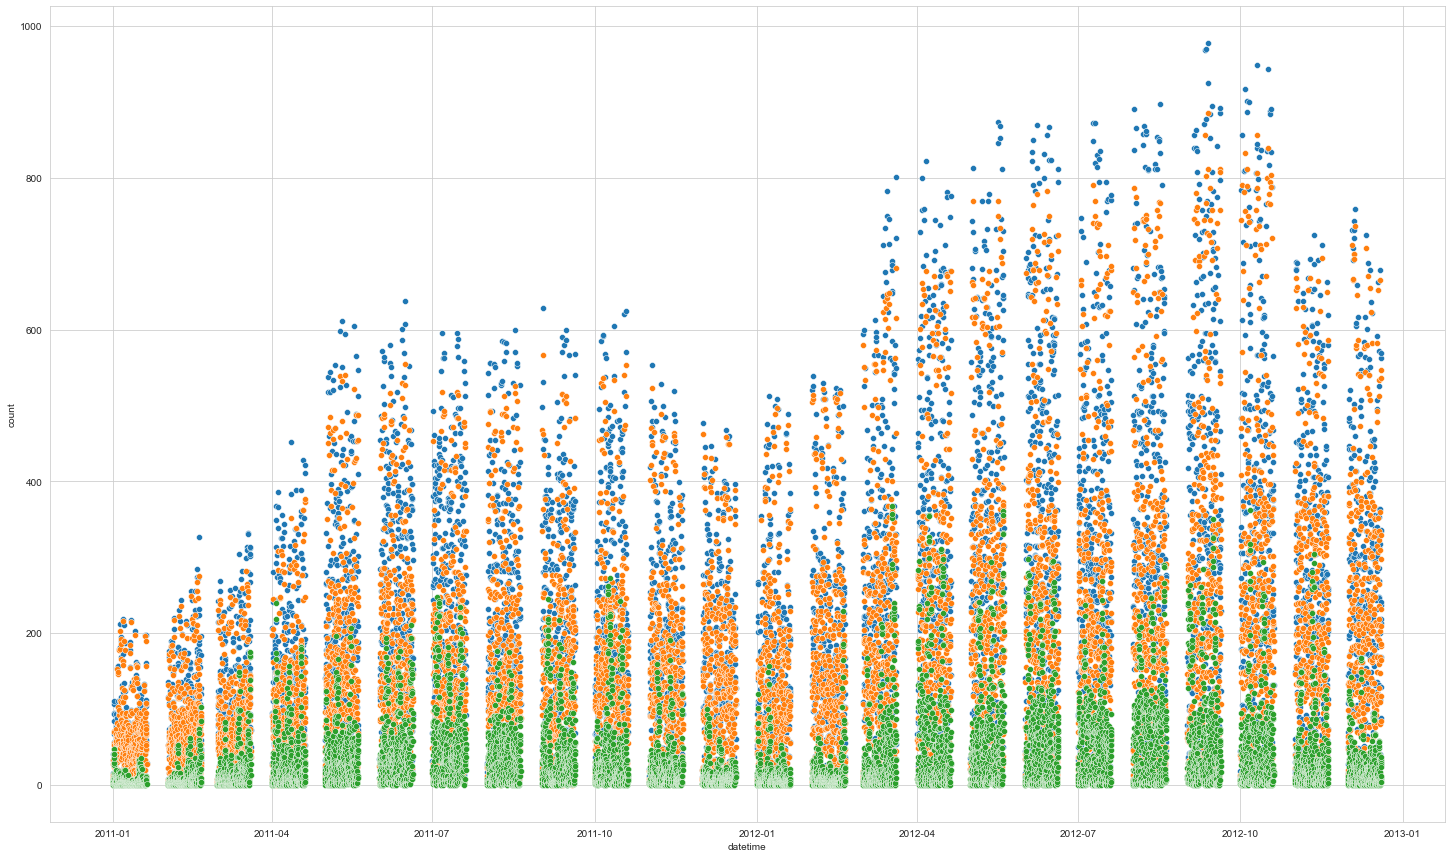

In [58]:
plt.figure(figsize=(25,15))
sns.scatterplot(x="datetime", y="count", data=dataset)
sns.scatterplot(x="datetime", y="registered", data=dataset)
sns.scatterplot(x="datetime", y="casual", data=dataset)

### Influence de la saison sur le nombre de locations

<AxesSubplot:xlabel='season', ylabel='count'>

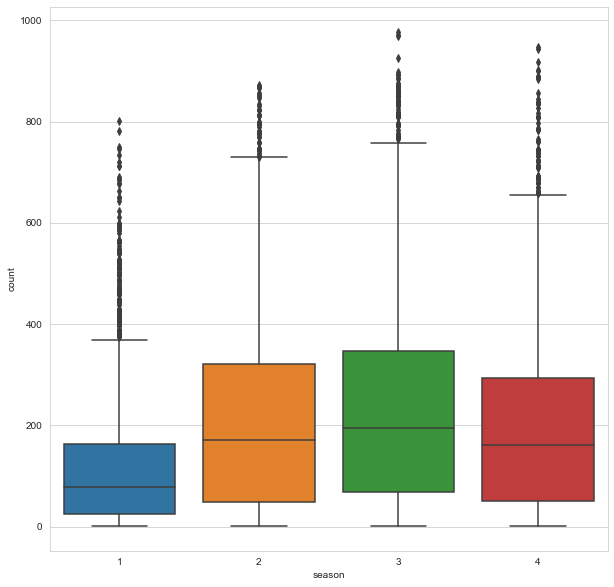

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x="season", y="count", data=dataset)

### Influence des vacances sur le nombre de locations

<AxesSubplot:xlabel='holiday', ylabel='count'>

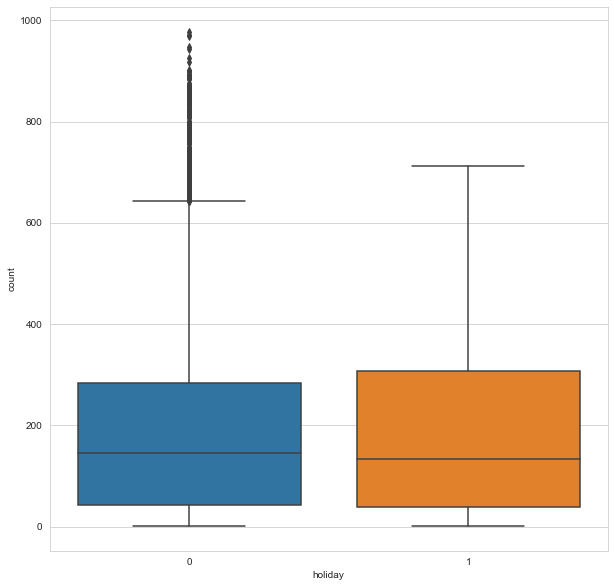

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x="holiday", y="count", data=dataset)

### Influence du jour de la semaine sur le nombre de locations

<AxesSubplot:xlabel='workingday', ylabel='count'>

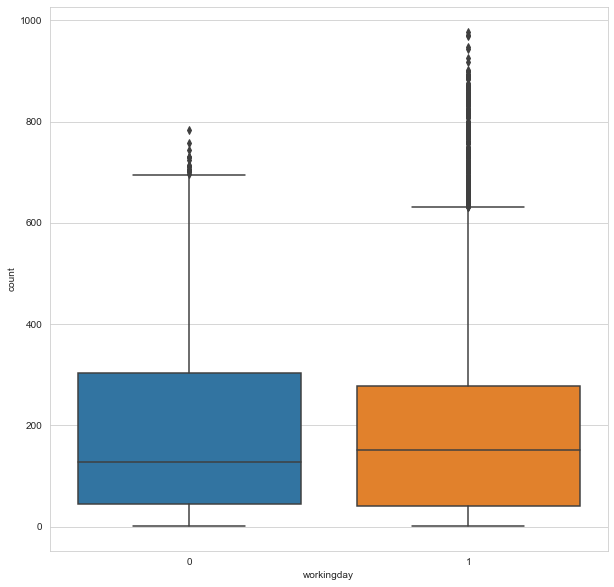

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="workingday", y="count", data=dataset)

### Influence de la météo sur le nombre de locations

<AxesSubplot:xlabel='weather', ylabel='count'>

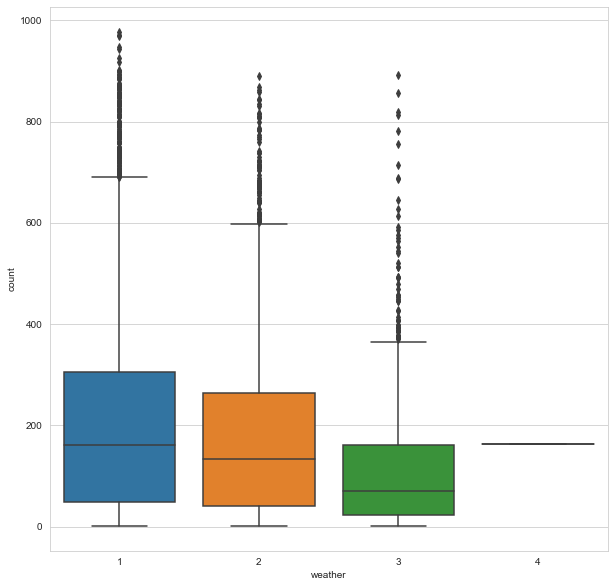

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x="weather", y="count", data=dataset)

### Influence de la température sur le nombre de locations

<AxesSubplot:xlabel='atemp', ylabel='count'>

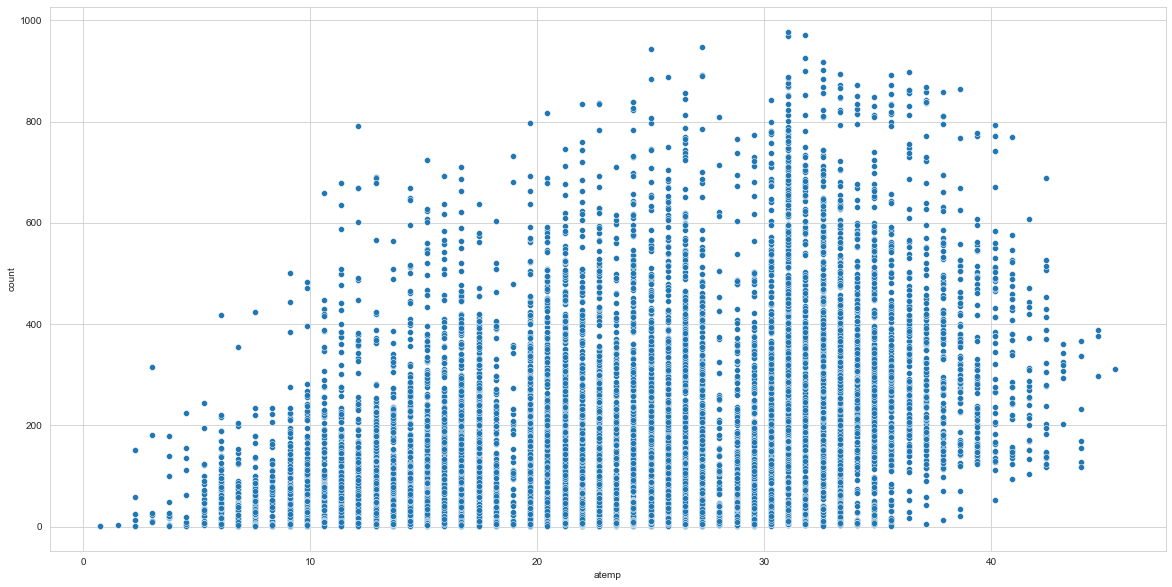

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="atemp", y="count", data=dataset)

### Influence de l'humidité sur le nombre total de locations

<AxesSubplot:xlabel='humidity', ylabel='count'>

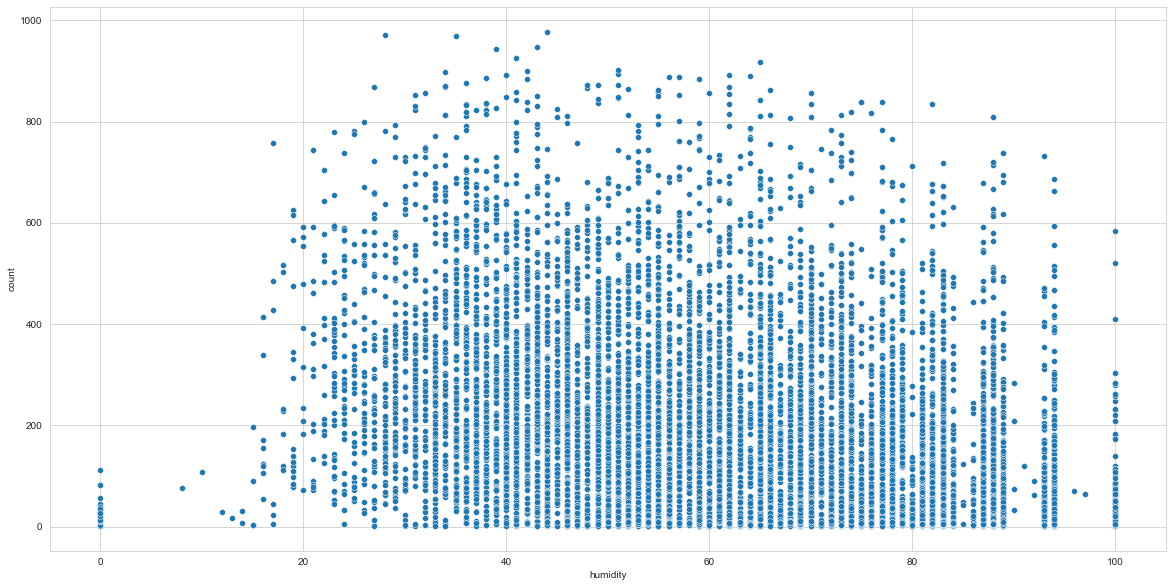

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="humidity", y="count", data=dataset)

### Influence de la vitesse du vent sur le nombre total de locations

<AxesSubplot:xlabel='windspeed', ylabel='count'>

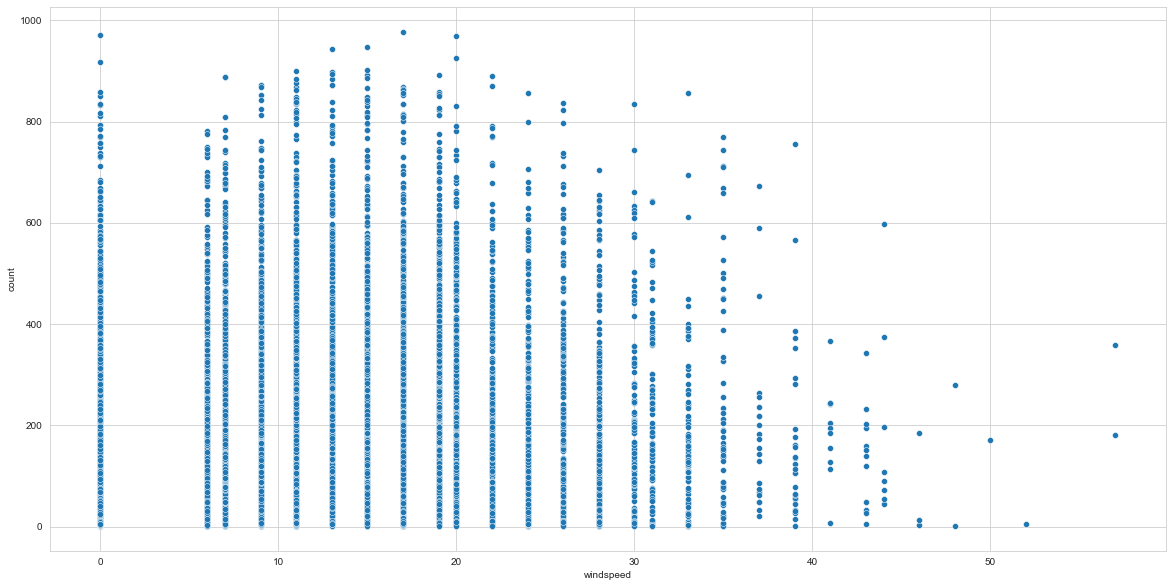

In [55]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="windspeed", y="count", data=dataset)

### Analyse des corrélations

### Résumé des observations

## Préparation du jeu de données

In [101]:
dataset.drop(columns=["datetime", "casual", "registered"], inplace=True)

### Séparation en jeux d'entraînement et de test

In [102]:
target = "count"

y = dataset[target]
X = dataset[dataset.columns.difference([target])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of train samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

Number of train samples: 8708
Number of test samples: 2178


### Feature Engineering

In [109]:
def assign_quarter(hour):
    if (hour >= 0) & (hour < 6):
        return "0h-6h"
    elif (hour >= 6) & (hour < 12):
        return "6h-12h"
    elif (hour >= 12) & (hour < 18):
        return "12h-18h"    
    elif (hour >= 18) & (hour < 24):
        return "18h-24h"

In [110]:
hour_quarter = dataset["hour"].apply(assign_quarter)
hour_col_idx = dataset.columns.get_loc("hour")
dataset.drop(columns=["hour"], inplace=True)
dataset.insert(loc=hour_col_idx, column="hour_quarter", value=hour_quarter)

In [111]:
dataset

,year,month,day,hour_quarter,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0h-6h,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,1,1,0h-6h,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,1,1,0h-6h,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,1,1,0h-6h,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,1,1,0h-6h,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,18h-24h,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012,12,19,18h-24h,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012,12,19,18h-24h,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012,12,19,18h-24h,4,0,1,1,13.94,17.425,61,6.0032,129


In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          10886 non-null  int64  
 1   month         10886 non-null  int64  
 2   day           10886 non-null  int64  
 3   hour_quarter  10886 non-null  object 
 4   season        10886 non-null  int64  
 5   holiday       10886 non-null  int64  
 6   workingday    10886 non-null  int64  
 7   weather       10886 non-null  int64  
 8   temp          10886 non-null  float64
 9   atemp         10886 non-null  float64
 10  humidity      10886 non-null  int64  
 11  windspeed     10886 non-null  float64
 12  count         10886 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.1+ MB


### One-Hot Encoding

In [129]:
encoder = OneHotEncoder()
X_train_e = encoder.fit_transform(X=X_train, y=None)

In [139]:
encoder.categories_

[array([ 0.76 ,  1.515,  2.275,  3.03 ,  3.79 ,  4.545,  5.305,  6.06 ,
         6.82 ,  7.575,  8.335,  9.09 ,  9.85 , 10.605, 11.365, 12.12 ,
        12.88 , 13.635, 14.395, 15.15 , 15.91 , 16.665, 17.425, 18.18 ,
        18.94 , 19.695, 20.455, 21.21 , 21.97 , 22.725, 23.485, 24.24 ,
        25.   , 25.76 , 26.515, 27.275, 28.03 , 28.79 , 29.545, 30.305,
        31.06 , 31.82 , 32.575, 33.335, 34.09 , 34.85 , 35.605, 36.365,
        37.12 , 37.88 , 38.635, 39.395, 40.15 , 40.91 , 41.665, 42.425,
        43.18 , 43.94 , 44.695, 45.455]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([  0,  10,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
         49

In [134]:
X_train_e.toarray().shape

(8708, 294)

### Normalisation

In [69]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>)